# Bike Sharing Assignment 

Author: Sudarshan (sudarshan_g@outlook.com) <br> Date Created: 2nd August 2023 <br> 
`View notebook on VSCode to navigate easily via Outline`

## Problem Statement: 

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

`Business Goal:`
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

## Dataset Characteristics

day.csv have the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

## Imports

In [77]:
## For data preparation & cleansing
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Model prep & validation
# SK
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

# StatsModels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [78]:
# Load the dataset. 
bike_shr_df = pd.read_csv("./day.csv")
bike_shr_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Data Cleansing

### Check for missing values

In [79]:
# No missing values
bike_shr_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### Check for duplicate values

In [80]:
bike_shr_df.shape

(730, 16)

In [81]:
bike_shr_df_1 = bike_shr_df.copy()
bike_shr_df_1.drop_duplicates(inplace=True)
bike_shr_df_1.shape

(730, 16)

`Findings/Observations:` Same shape after dropping duplicates, therefore we don't have any duplicates.

### Dropping columns that are not relevant

In [82]:
bike_shr_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [83]:
bike_shr_df.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,1,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


Let's drop the following items - 
- `instant` - index value. 
- `dteday` - `mnth` and `yr` already part of the dataset, 0 -> 2018, 1->2019.
- `casual/registered` - Not required as we are focused on driving up the total count of users and not by category.

In [84]:
bike_shr_df.drop(['instant', 'dteday', 'casual', 'registered'], axis=1, inplace=True)
bike_shr_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


### Mapping things for visualization

In [85]:
bike_shr_df.season = bike_shr_df.season.map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'}).astype('string') # Season
bike_shr_df.mnth = bike_shr_df.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}).astype('string') # Month
bike_shr_df.weekday = bike_shr_df.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'}).astype('string') # day
bike_shr_df.weathersit = bike_shr_df.weathersit.map({1:'mostly_clear',2:'misty',3:'snowrain_light',4:'snowrain_heavy'}).astype('string') # Weather
bike_shr_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Sat,0,misty,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Sun,0,misty,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Mon,1,mostly_clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tue,1,mostly_clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wed,1,mostly_clear,9.305237,11.46350,43.6957,12.522300,1600


In [86]:
bike_shr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    string 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    string 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    string 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    string 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), string(4)
memory usage: 68.6 KB


## Data Visualization (Categorical & Numerical)

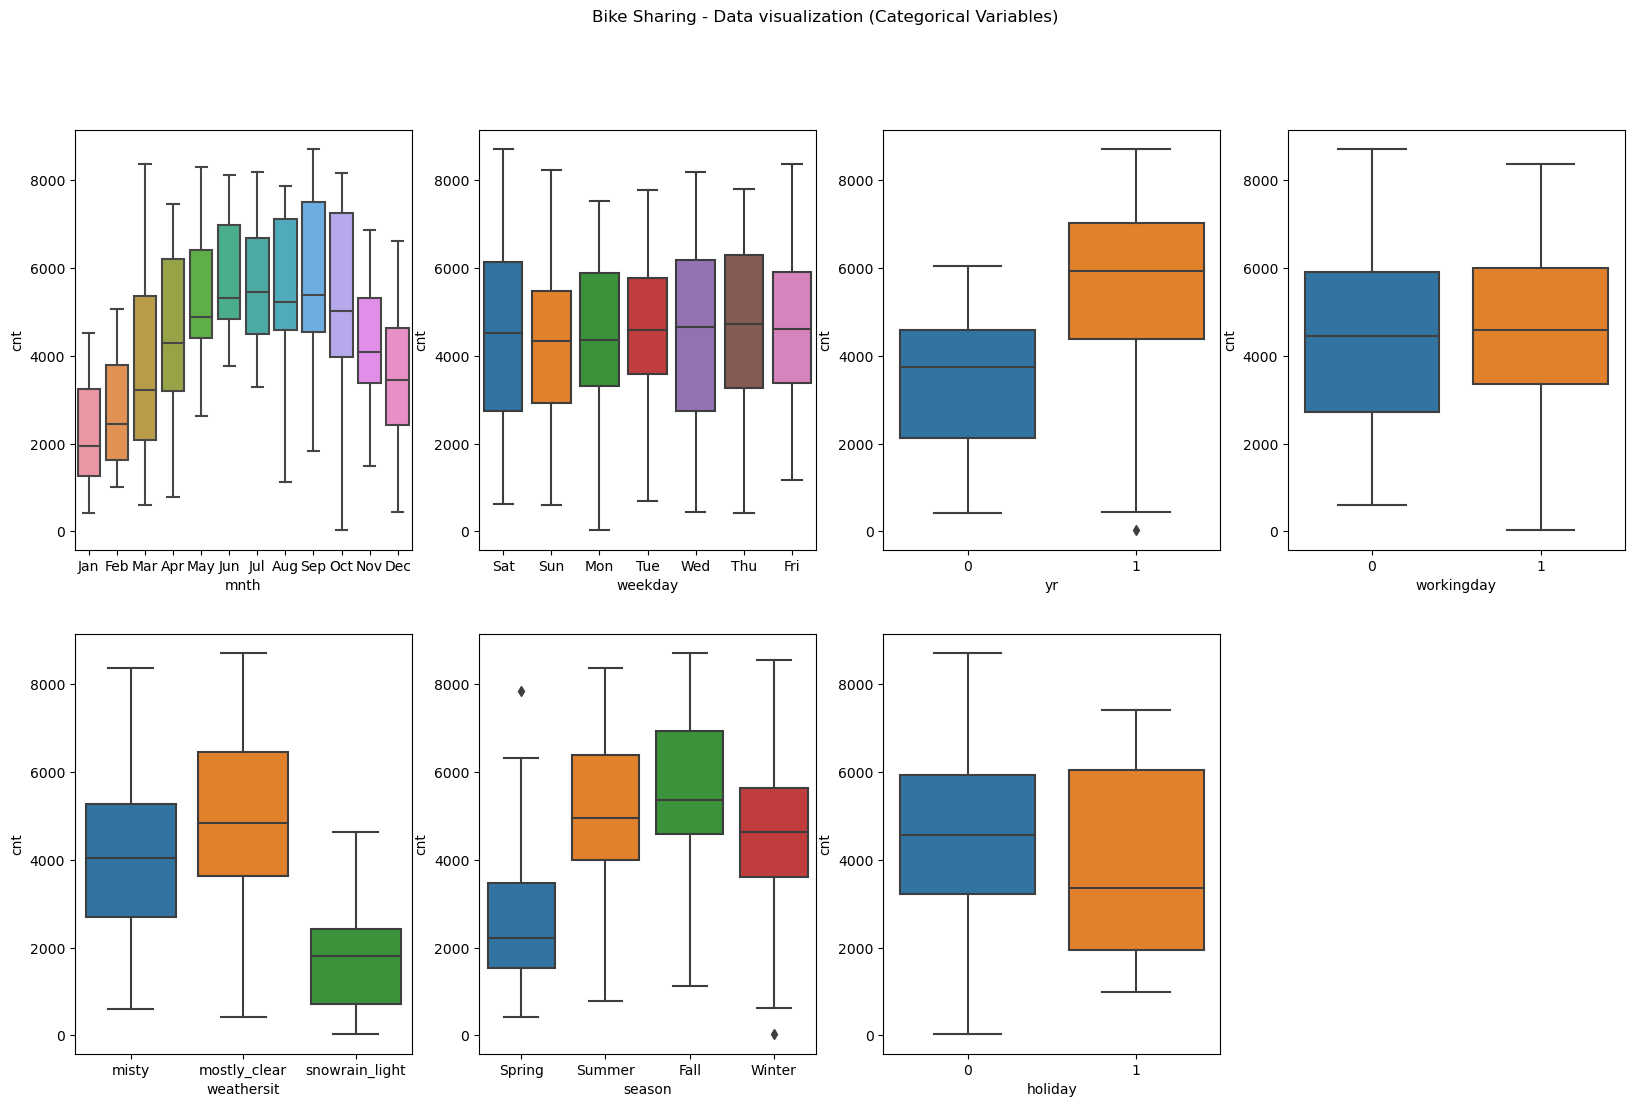

In [87]:
## Visualizing categorical variables against cnt
plt.figure(figsize=(20,12))
plt.subplot(2,4,1)
sns.boxplot(data=bike_shr_df, y='cnt',x='mnth')
plt.subplot(2,4,2)
sns.boxplot(data=bike_shr_df, y='cnt',x='weekday')
plt.subplot(2,4,3)
sns.boxplot(data=bike_shr_df, y='cnt',x='yr')
plt.subplot(2,4,4)
sns.boxplot(data=bike_shr_df, y='cnt',x='workingday')
plt.subplot(2,4,5)
sns.boxplot(data=bike_shr_df, y='cnt',x='weathersit')
plt.subplot(2,4,6)
sns.boxplot(data=bike_shr_df, y='cnt',x='season')
plt.subplot(2,4,7)
sns.boxplot(data=bike_shr_df, y='cnt',x='holiday')
plt.suptitle("Bike Sharing - Data visualization (Categorical Variables)")
plt.show()

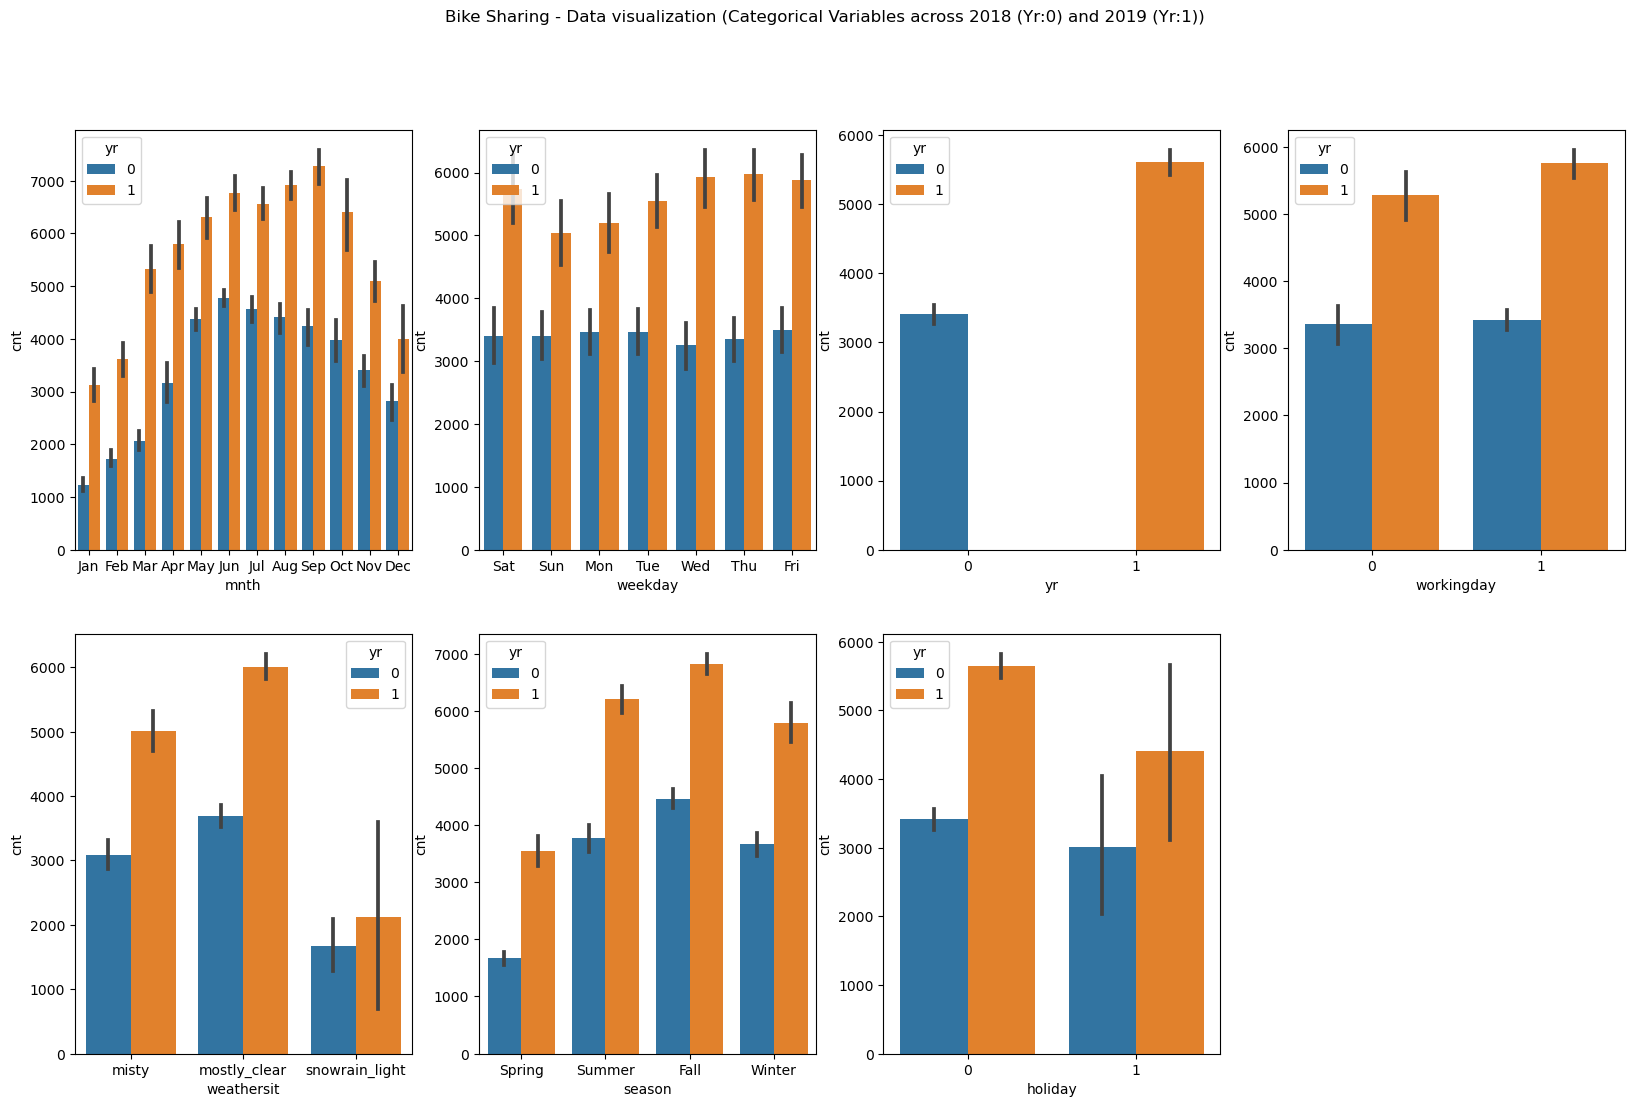

In [88]:
plt.figure(figsize=(20,12))
plt.subplot(2,4,1)
sns.barplot(data=bike_shr_df, y='cnt',x='mnth', hue='yr')
plt.subplot(2,4,2)
sns.barplot(data=bike_shr_df, y='cnt',x='weekday', hue='yr')
plt.subplot(2,4,3)
sns.barplot(data=bike_shr_df, y='cnt',x='yr', hue='yr')
plt.subplot(2,4,4)
sns.barplot(data=bike_shr_df, y='cnt',x='workingday', hue='yr')
plt.subplot(2,4,5)
sns.barplot(data=bike_shr_df, y='cnt',x='weathersit', hue='yr')
plt.subplot(2,4,6)
sns.barplot(data=bike_shr_df, y='cnt',x='season', hue='yr')
plt.subplot(2,4,7)
sns.barplot(data=bike_shr_df, y='cnt',x='holiday', hue='yr')
plt.suptitle("Bike Sharing - Data visualization (Categorical Variables across 2018 (Yr:0) and 2019 (Yr:1))")
plt.show()

<Figure size 1500x1800 with 0 Axes>

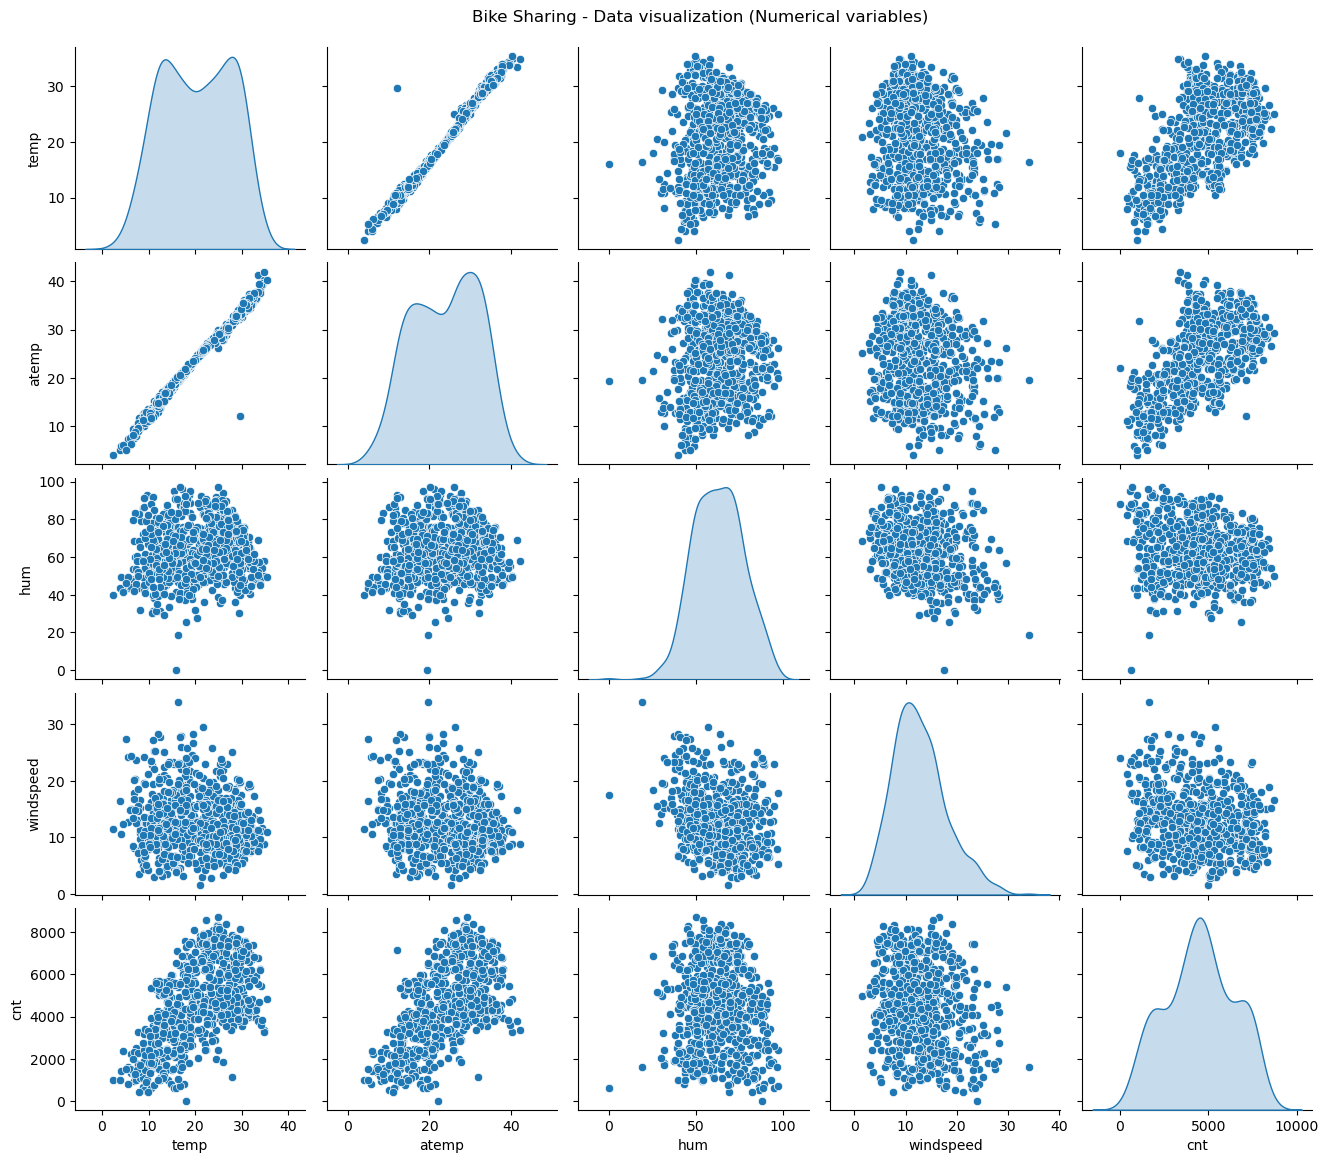

In [89]:
# Visualization numerical variables.
plt.figure(figsize=(15,18))
sns.pairplot(data=bike_shr_df, vars=['temp', 'atemp', 'hum', 'windspeed', 'cnt'], diag_kind='kde')
plt.suptitle("Bike Sharing - Data visualization (Numerical variables)")
plt.subplots_adjust(left=0, right=0.99, top=0.95, bottom=0.1)
plt.show()

## Data Analysis


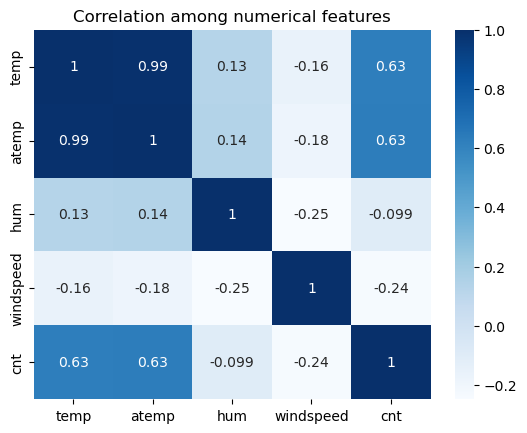

In [90]:
# Correlation
sns.heatmap(bike_shr_df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr(), cmap='Blues', annot=True)
plt.title("Correlation among numerical features")
plt.show()

`Findings/Observations`:
- Very high +ve correlation between `atemp` and `temp`. Keeping them for now, but it can be dropped later for LR. 
- High +ve correlation between `temp` and `cnt`

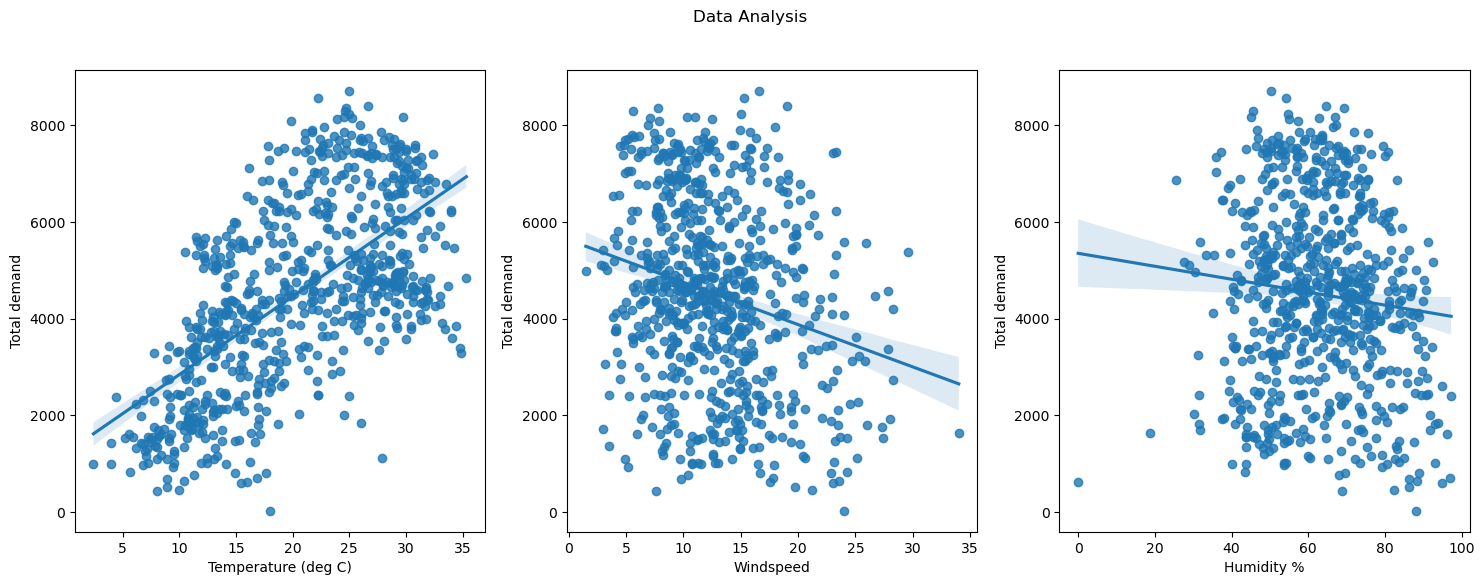

In [91]:
plt.figure(figsize=(18,6))
y_label = 'Total demand'
plt.suptitle("Data Analysis")
plt.subplot(1,3,1)
sns.regplot(data=bike_shr_df, y='cnt', x='temp')
plt.xlabel("Temperature (deg C)")
plt.ylabel(y_label)
plt.subplot(1,3,2)
sns.regplot(data=bike_shr_df, y='cnt', x='windspeed')
plt.xlabel('Windspeed')
plt.ylabel(y_label)
plt.subplot(1,3,3)
sns.regplot(data=bike_shr_df, y='cnt', x='hum')
plt.xlabel('Humidity %')
plt.ylabel(y_label)
plt.show()


`Findings/Observations`
- `Temperature`: +ve correlation with total demand, linear relation.
- `Windspeed`: Highly scatterred but slightly decreasing trend with high windspeed.
- `Humidity`: Slight -ve correlation with humidity. We see a slight dip in bike demand as humidity rises

In [92]:
bike_shr_df.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


## Data Preparation for Linear Regression

### Create dummy variables & contact with main DF

In [93]:
# k-1 can account for k values, dropping first while creating dummies
months_df = pd.get_dummies(bike_shr_df.mnth, prefix='mnth', drop_first=True)
weekdays_df = pd.get_dummies(bike_shr_df.weekday, prefix='wday', drop_first=True)
weathersit_df = pd.get_dummies(bike_shr_df.weathersit,prefix='wthr', drop_first=True)
seasons_df = pd.get_dummies(bike_shr_df.season, prefix='season', drop_first=True)
bike_shr_df.head()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Sat,0,misty,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Sun,0,misty,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Mon,1,mostly_clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tue,1,mostly_clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wed,1,mostly_clear,9.305237,11.46350,43.6957,12.522300,1600


In [94]:
# Merge the dummies to main dataframe
bike_shr_df = pd.concat([bike_shr_df, months_df, weekdays_df, weathersit_df, seasons_df], axis=1)
bike_shr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   season               730 non-null    string 
 1   yr                   730 non-null    int64  
 2   mnth                 730 non-null    string 
 3   holiday              730 non-null    int64  
 4   weekday              730 non-null    string 
 5   workingday           730 non-null    int64  
 6   weathersit           730 non-null    string 
 7   temp                 730 non-null    float64
 8   atemp                730 non-null    float64
 9   hum                  730 non-null    float64
 10  windspeed            730 non-null    float64
 11  cnt                  730 non-null    int64  
 12  mnth_Aug             730 non-null    uint8  
 13  mnth_Dec             730 non-null    uint8  
 14  mnth_Feb             730 non-null    uint8  
 15  mnth_Jan             730 non-null    uin

In [95]:
# Dropping months, weekdays, weather and season as we now have dummy variables for it. 
bike_shr_df.drop(['season', 'weekday', 'weathersit', 'mnth'], axis=1, inplace=True)
bike_shr_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,mnth_Aug,mnth_Dec,...,wday_Sat,wday_Sun,wday_Thu,wday_Tue,wday_Wed,wthr_mostly_clear,wthr_snowrain_light,season_Spring,season_Summer,season_Winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,1,0,0,0,0,0,0,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,1,0,0,0,0,0,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,1,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,1,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,1,0,1,0,0


In [96]:
bike_shr_df.shape

(730, 30)

### Splitting for training and testing & Scaling

In [97]:
from sklearn.model_selection import train_test_split
bike_shr_train_df, bike_shr_test_df = train_test_split(bike_shr_df, train_size=0.7, test_size=0.3, random_state=100)
print("Training dataset: {0}".format(bike_shr_train_df.shape))
print("Testing dataset: {0}".format(bike_shr_test_df.shape))

Training dataset: (510, 30)
Testing dataset: (219, 30)


### Training dataset numerical visualizations



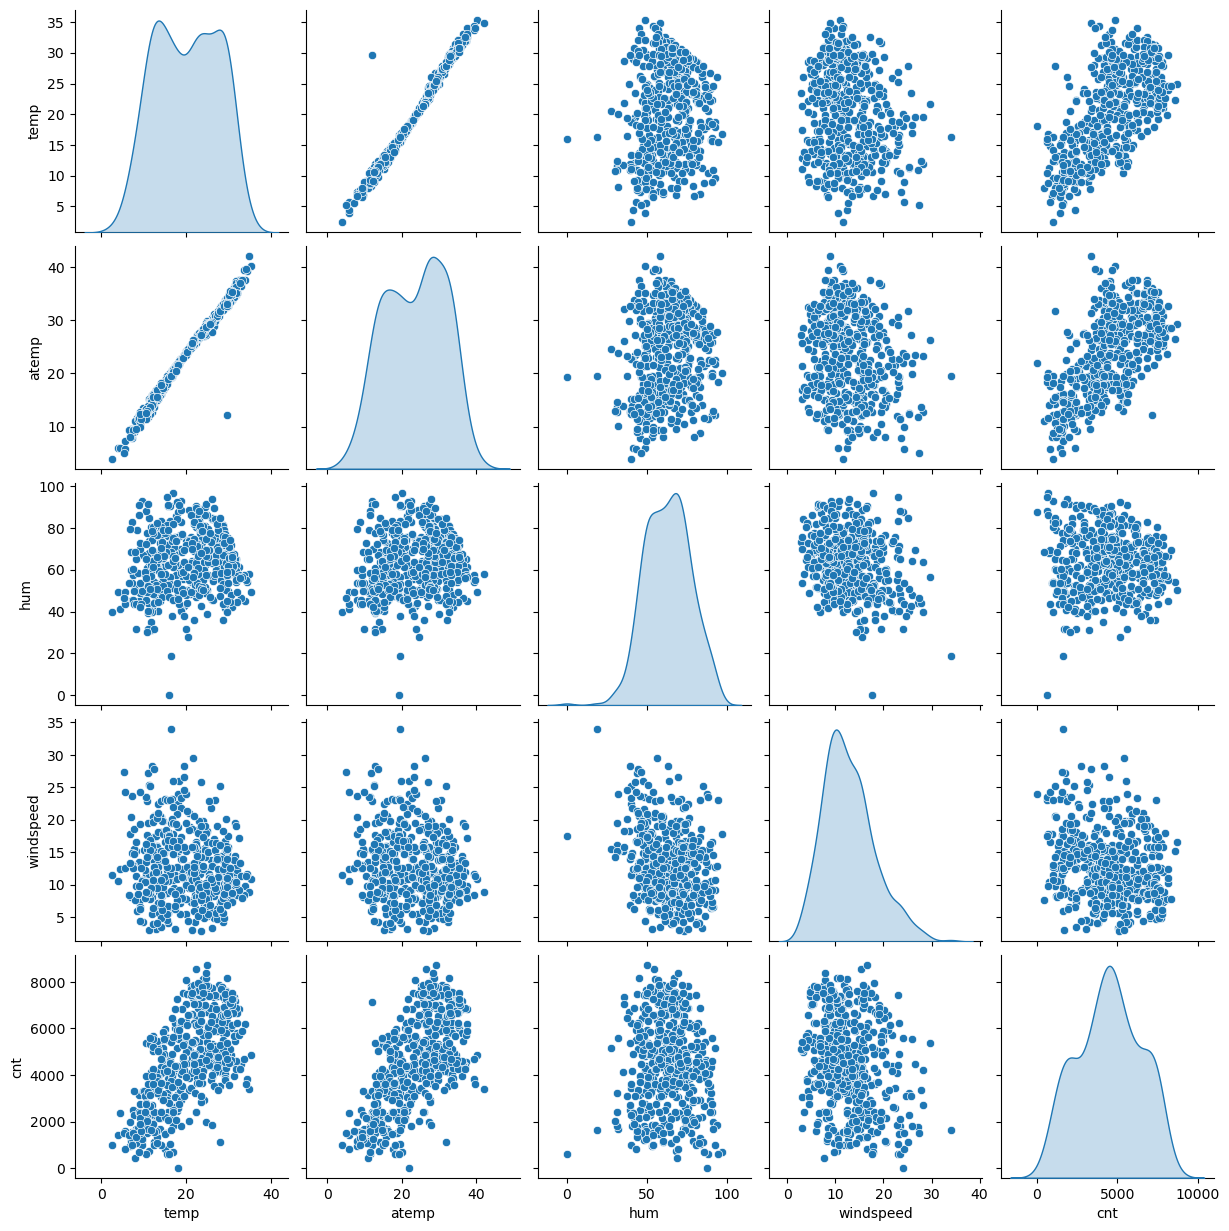

In [98]:
sns.pairplot(bike_shr_train_df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']], diag_kind='kde')
plt.show()

### Rescaling features

In [99]:
# Create the scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [100]:
numerics = ['temp', 'atemp', 'hum', 'windspeed']
bike_shr_train_df[numerics] = scaler.fit_transform(bike_shr_train_df[numerics])
bike_shr_train_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,mnth_Aug,mnth_Dec,...,wday_Sat,wday_Sun,wday_Thu,wday_Tue,wday_Wed,wthr_mostly_clear,wthr_snowrain_light,season_Spring,season_Summer,season_Winter
653,1,0,1,0.509887,0.501133,0.575354,0.300794,7534,0,0,...,0,0,0,1,0,1,0,0,0,1
576,1,0,1,0.815169,0.766351,0.725633,0.264686,7216,0,0,...,0,0,0,1,0,1,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,4066,0,0,...,1,0,0,0,0,0,0,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,1796,0,1,...,0,1,0,0,0,1,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,4220,0,0,...,1,0,0,0,0,0,0,0,1,0


In [101]:
bike_shr_train_df.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,mnth_Aug,mnth_Dec,...,wday_Sat,wday_Sun,wday_Thu,wday_Tue,wday_Wed,wthr_mostly_clear,wthr_snowrain_light,season_Spring,season_Summer,season_Winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,4486.382353,0.096078,0.084314,...,0.154902,0.143137,0.133333,0.131373,0.158824,0.627451,0.029412,0.243137,0.245098,0.24902
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,1952.158739,0.294988,0.278131,...,0.362166,0.350557,0.340268,0.338139,0.365870,0.483958,0.169124,0.429398,0.430568,0.43287
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,3120.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,4530.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,5973.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


## Building linear model

### Using RFE for coarse tuning and selecting major features quickly. 
- Picking 2/3 of the features available for RFE

In [102]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

y_train = bike_shr_train_df.pop('cnt')
X_train = bike_shr_train_df

lr = LinearRegression()
lr.fit(X_train, y_train)
rfe = RFE(lr, n_features_to_select=20) # 
rfe = rfe.fit(X_train, y_train)

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('mnth_Aug', False, 2),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', True, 1),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 9),
 ('mnth_Mar', False, 10),
 ('mnth_May', True, 1),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 6),
 ('mnth_Sep', True, 1),
 ('wday_Mon', False, 4),
 ('wday_Sat', True, 1),
 ('wday_Sun', False, 3),
 ('wday_Thu', False, 7),
 ('wday_Tue', False, 5),
 ('wday_Wed', False, 8),
 ('wthr_mostly_clear', True, 1),
 ('wthr_snowrain_light', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1)]

In [103]:
# Selected columns
print("Selected Columns: {0}".format(X_train.columns[rfe.support_]))
# Rejected columns
print("Rejected Columns: {0}".format(X_train.columns[~rfe.support_]))

selected_columns = X_train.columns[rfe.support_]
X_train_rfe = X_train[selected_columns]

Selected Columns: Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_May', 'mnth_Nov',
       'mnth_Sep', 'wday_Sat', 'wthr_mostly_clear', 'wthr_snowrain_light',
       'season_Spring', 'season_Summer', 'season_Winter'],
      dtype='object')
Rejected Columns: Index(['mnth_Aug', 'mnth_Jun', 'mnth_Mar', 'mnth_Oct', 'wday_Mon', 'wday_Sun',
       'wday_Thu', 'wday_Tue', 'wday_Wed'],
      dtype='object')


In [104]:
X_train_rfe.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_May,mnth_Nov,mnth_Sep,wday_Sat,wthr_mostly_clear,wthr_snowrain_light,season_Spring,season_Summer,season_Winter
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0,0,0,0,0,0,0,0,1,0,0,0,1
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,1,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0,0,0,0,0,0,0,1,0,0,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,1,0,0,0,0,0,0,0,1,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,0,0,0,0,0,0,1,0,0,0,1,0


In [105]:
X_train_rfe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   yr                   510 non-null    int64  
 1   holiday              510 non-null    int64  
 2   workingday           510 non-null    int64  
 3   temp                 510 non-null    float64
 4   atemp                510 non-null    float64
 5   hum                  510 non-null    float64
 6   windspeed            510 non-null    float64
 7   mnth_Dec             510 non-null    uint8  
 8   mnth_Feb             510 non-null    uint8  
 9   mnth_Jan             510 non-null    uint8  
 10  mnth_Jul             510 non-null    uint8  
 11  mnth_May             510 non-null    uint8  
 12  mnth_Nov             510 non-null    uint8  
 13  mnth_Sep             510 non-null    uint8  
 14  wday_Sat             510 non-null    uint8  
 15  wthr_mostly_clear    510 non-null    ui

## Fine tuning model using StatsModel

In [106]:
## Function to rebuild the model iteratively using SM
def build_sm_model(feature_set):
    SM_X_train = sm.add_constant(X_train[feature_set])
    lm = sm.OLS(y_train, SM_X_train).fit()
    print(lm.summary())
    return lm;

In [107]:
## Function to get VIF for a list of specified features
def get_VIF(feature_set):    
    df = X_train[feature_set]    
    result = pd.DataFrame()    
    result['feature'] = X_train[feature_set].columns    
    result['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]    
    result['VIF'] = round(result['VIF'],2)
    result = result.sort_values(by='VIF', ascending=False)
    print(result)    
    return

### Starting Iterations: Correlation Check on X_Train


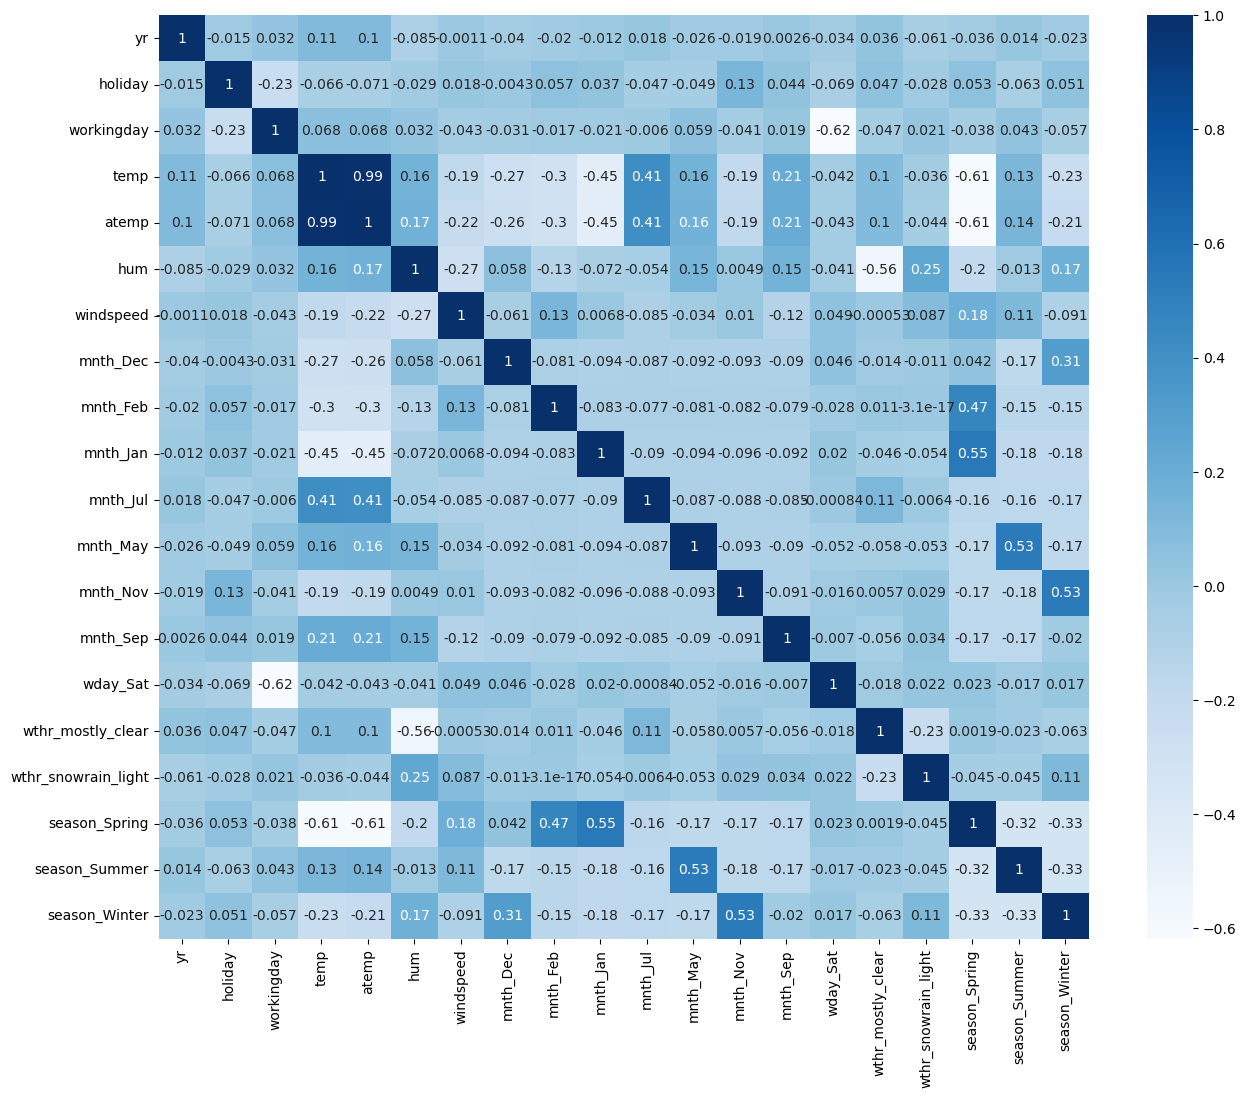

In [108]:
## Checking correlation 
plt.figure(figsize=(15,12))
sns.heatmap(X_train[selected_columns].corr(), cmap="Blues", annot=True)
plt.show()

### Iteration 1: Initial model

In [109]:
feature_set = selected_columns;
build_sm_model(feature_set);
get_VIF(feature_set);

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     141.1
Date:                Mon, 07 Aug 2023   Prob (F-statistic):          1.94e-188
Time:                        14:22:35   Log-Likelihood:                -4099.5
No. Observations:                 510   AIC:                             8241.
Df Residuals:                     489   BIC:                             8330.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2098.1964    

### Iteration 2: Drops `atemp`, Reason: High p-value and high VIF

In [110]:
# Dropping atemp - high p-value and high VIF
feature_set = feature_set[feature_set != 'atemp']
build_sm_model(feature_set);
get_VIF(feature_set);

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     148.8
Date:                Mon, 07 Aug 2023   Prob (F-statistic):          1.59e-189
Time:                        14:22:35   Log-Likelihood:                -4099.5
No. Observations:                 510   AIC:                             8239.
Df Residuals:                     490   BIC:                             8324.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2095.5762    

### Iteration 3: Drops `hum` due to high VIF. 

In [111]:
# Dropping hum due to high VIF in previous Iteration (27.09)
feature_set = feature_set[feature_set != 'hum']
build_sm_model(feature_set);
get_VIF(feature_set);

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     151.4
Date:                Mon, 07 Aug 2023   Prob (F-statistic):          3.94e-187
Time:                        14:22:35   Log-Likelihood:                -4108.0
No. Observations:                 510   AIC:                             8254.
Df Residuals:                     491   BIC:                             8334.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1238.9851    

### Iteration 4: Drops `mnth_May` due to high p-Value, `temp` is kept even if there is high VIF as it's a important factor from a business perspective

In [112]:
# Let's drop mnth_May as it's high p-value (0.342)               
feature_set = feature_set[feature_set != 'mnth_May']
build_sm_model(feature_set);
get_VIF(feature_set);

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     160.3
Date:                Mon, 07 Aug 2023   Prob (F-statistic):          4.80e-188
Time:                        14:22:35   Log-Likelihood:                -4108.4
No. Observations:                 510   AIC:                             8253.
Df Residuals:                     492   BIC:                             8329.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1197.9077    

### Iteration 5: Drops mnth_Feb due to high p-Value

In [113]:
# Dropping mnth_Feb, high p-value 0.092
feature_set = feature_set[feature_set != 'mnth_Feb']
build_sm_model(feature_set);
get_VIF(feature_set);

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     169.5
Date:                Mon, 07 Aug 2023   Prob (F-statistic):          1.49e-188
Time:                        14:22:35   Log-Likelihood:                -4109.9
No. Observations:                 510   AIC:                             8254.
Df Residuals:                     493   BIC:                             8326.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1082.7370    

### Iteration 6: Drops `holiday` due to high p-Value

In [114]:
# Dropping holiday, high p-value 0.068
feature_set = feature_set[feature_set != 'holiday']
build_sm_model(feature_set);
get_VIF(feature_set);

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.7
Date:                Mon, 07 Aug 2023   Prob (F-statistic):          5.71e-189
Time:                        14:22:35   Log-Likelihood:                -4111.6
No. Observations:                 510   AIC:                             8255.
Df Residuals:                     494   BIC:                             8323.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1037.5870    

### Iteration 7: Drops `season_Summer` due to high p-Value

In [115]:
# Dropping season_Summer, high p-value 0.027
feature_set = feature_set[feature_set != 'season_Summer']
build_sm_model(feature_set);
get_VIF(feature_set);

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.7
Date:                Mon, 07 Aug 2023   Prob (F-statistic):          4.64e-189
Time:                        14:22:35   Log-Likelihood:                -4114.1
No. Observations:                 510   AIC:                             8258.
Df Residuals:                     495   BIC:                             8322.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1419.4542    

### Iteration 8: Drops `workingday` due to 2nd highest VIF, `temp` is kept as it's a important metric even if it has highest VIF

In [116]:
## We know temp is a important metric, let's drop the 2nd highest VIF (workingday: 4.48) to see if that gives 
# a better model with temp - workingday
feature_set = feature_set[feature_set != 'workingday']
build_sm_model(feature_set);
get_VIF(feature_set);

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     194.2
Date:                Mon, 07 Aug 2023   Prob (F-statistic):          5.60e-185
Time:                        14:22:36   Log-Likelihood:                -4126.6
No. Observations:                 510   AIC:                             8281.
Df Residuals:                     496   BIC:                             8341.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1816.1375    

### Iteration 9: Drops `wday_Sat` due to high p-Value


In [117]:
## Dropping wday_Sat with high p-value 0.042
feature_set = feature_set[feature_set != 'wday_Sat']
build_sm_model(feature_set);
get_VIF(feature_set);

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     208.7
Date:                Mon, 07 Aug 2023   Prob (F-statistic):          2.97e-185
Time:                        14:22:36   Log-Likelihood:                -4128.7
No. Observations:                 510   AIC:                             8283.
Df Residuals:                     497   BIC:                             8339.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1845.5104    

### Iteration 10: Drops `windspeed` with 2nd highest VIF even if it's below 5, so that we can keep `temp` in the equation

In [118]:
## Dropping 2nd highest VIF - windspeed 4.07
feature_set = feature_set[feature_set != 'windspeed']
build_sm_model(feature_set);
get_VIF(feature_set);

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     209.1
Date:                Mon, 07 Aug 2023   Prob (F-statistic):          1.11e-178
Time:                        14:22:36   Log-Likelihood:                -4147.1
No. Observations:                 510   AIC:                             8318.
Df Residuals:                     498   BIC:                             8369.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1240.4860    

### Iteration 11: Drops `mnth_Jan` due to high p-Value

In [119]:
# Dropping mnth_Jan, high p-value - 0.039
feature_set = feature_set[feature_set != 'mnth_Jan']
build_sm_model(feature_set);
get_VIF(feature_set);

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     228.1
Date:                Mon, 07 Aug 2023   Prob (F-statistic):          6.04e-179
Time:                        14:22:36   Log-Likelihood:                -4149.3
No. Observations:                 510   AIC:                             8321.
Df Residuals:                     499   BIC:                             8367.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1130.6228    

### Iteration 12: Drops `mnth_Dec` due to high p-Value


In [120]:
# VIF has dropped below acceptable levels of 5. 
# Let's drop few variables with high p-values.
# Dropping mnth_dec, high p-value - 0.067
feature_set = feature_set[feature_set != 'mnth_Dec']
build_sm_model(feature_set);
get_VIF(feature_set);

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     251.8
Date:                Mon, 07 Aug 2023   Prob (F-statistic):          1.98e-179
Time:                        14:22:36   Log-Likelihood:                -4151.0
No. Observations:                 510   AIC:                             8322.
Df Residuals:                     500   BIC:                             8364.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1058.9207    

### Iteration 13: Drops `mnth_Nov` due to high p-Value

In [121]:
# Dropping mnth_Nov, high p-value 0.030
feature_set = feature_set[feature_set != 'mnth_Nov']
build_sm_model(feature_set);
get_VIF(feature_set);

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     280.6
Date:                Mon, 07 Aug 2023   Prob (F-statistic):          1.21e-179
Time:                        14:22:36   Log-Likelihood:                -4153.4
No. Observations:                 510   AIC:                             8325.
Df Residuals:                     501   BIC:                             8363.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1010.0584    

`Final model`:
- `VIF` - All VIFs below 5. -> No Multicollinearity issues
- `p-value` - p-Values are less than 0.05. They are all 0.000 -> Statistically Significant features 
- `F-Statistic` - `280.6` greater than 1. -> Statistically Significant Model as a whole.
- `F-Statistic Probability` - 1.21e-179 ~ 0
- `R-squared and Adjusted R-squared`- `81.8%` and `81.5%` respectively. -> Explains ~80% of `cnt` on training dataset

## Selected Model Paramaters

In [122]:
def Create_LR_Model(X, y):
    lr = LinearRegression()
    lr.fit(X,y)
    return lr

In [123]:
lm = build_sm_model(feature_set)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     280.6
Date:                Mon, 07 Aug 2023   Prob (F-statistic):          1.21e-179
Time:                        14:22:36   Log-Likelihood:                -4153.4
No. Observations:                 510   AIC:                             8325.
Df Residuals:                     501   BIC:                             8363.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1010.0584    

### Coefficients & Intercept

In [124]:
bike_shr_lr = Create_LR_Model(X_train[feature_set], y_train)
print("Selected features: {0}".format(bike_shr_lr.feature_names_in_))
print("Coefficients: {0}".format(bike_shr_lr.coef_))
print("Intercept: {0}".format(bike_shr_lr.intercept_))

Selected features: ['yr' 'temp' 'mnth_Jul' 'mnth_Sep' 'wthr_mostly_clear'
 'wthr_snowrain_light' 'season_Spring' 'season_Winter']
Coefficients: [ 2028.99519007  4103.23475256  -589.10488056   539.64800683
   676.26522172 -1897.66466718  -987.17355903   460.09911301]
Intercept: 1010.058413633335


In [125]:
round(lm.params, 4)

const                  1010.0584
yr                     2028.9952
temp                   4103.2348
mnth_Jul               -589.1049
mnth_Sep                539.6480
wthr_mostly_clear       676.2652
wthr_snowrain_light   -1897.6647
season_Spring          -987.1736
season_Winter           460.0991
dtype: float64

## Model Evaluation

### Correlation/Collinearity from heatmap

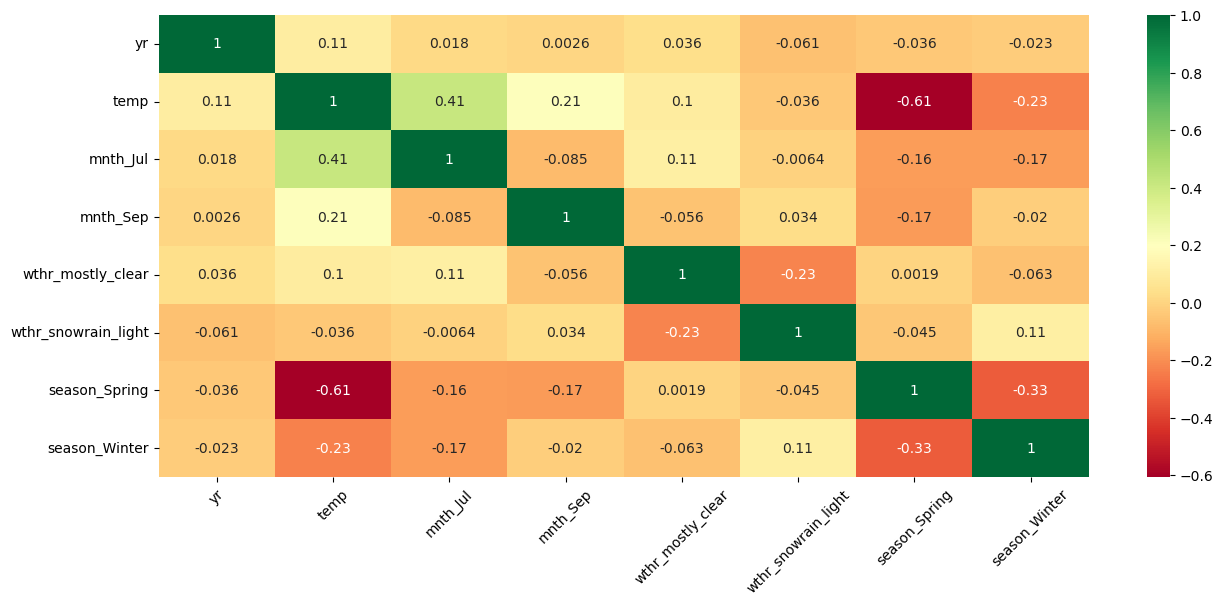

In [126]:
plt.figure(figsize=(15,6))
sns.heatmap(X_train[feature_set].corr(), annot=True, cmap='RdYlGn')
plt.xticks(rotation=45)
plt.show()

In [133]:
get_VIF(feature_set)

               feature   VIF
1                 temp  3.88
4    wthr_mostly_clear  2.79
0                   yr  2.05
7        season_Winter  1.34
2             mnth_Jul  1.32
6        season_Spring  1.32
3             mnth_Sep  1.19
5  wthr_snowrain_light  1.09


`Findings/Observations:` All VIF less than 5, no strong correlations/collinearity as seen from heatmap

### Error distribution

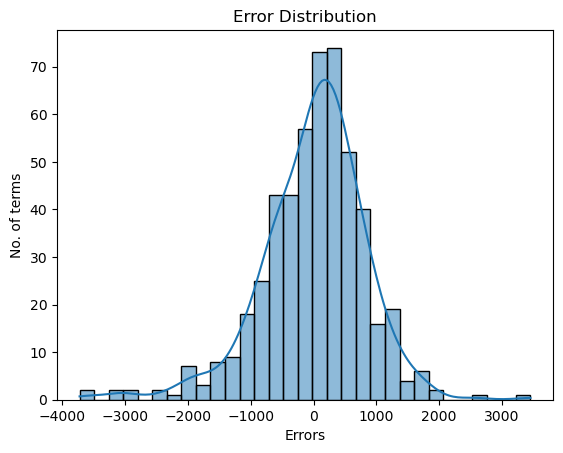

In [127]:
y_train_pred = bike_shr_lr.predict(X_train[feature_set])

def error_plot(actual, prediction):
    sns.histplot(actual - prediction, kde=True)
    plt.title('Error Distribution')
    plt.xlabel('Errors')
    plt.ylabel('No. of terms')

error_plot(y_train, y_train_pred)

`Findings/Observations:`  Error terms are normally distributed with mean as 0.

### Visualizing Linearity in training data & predictions

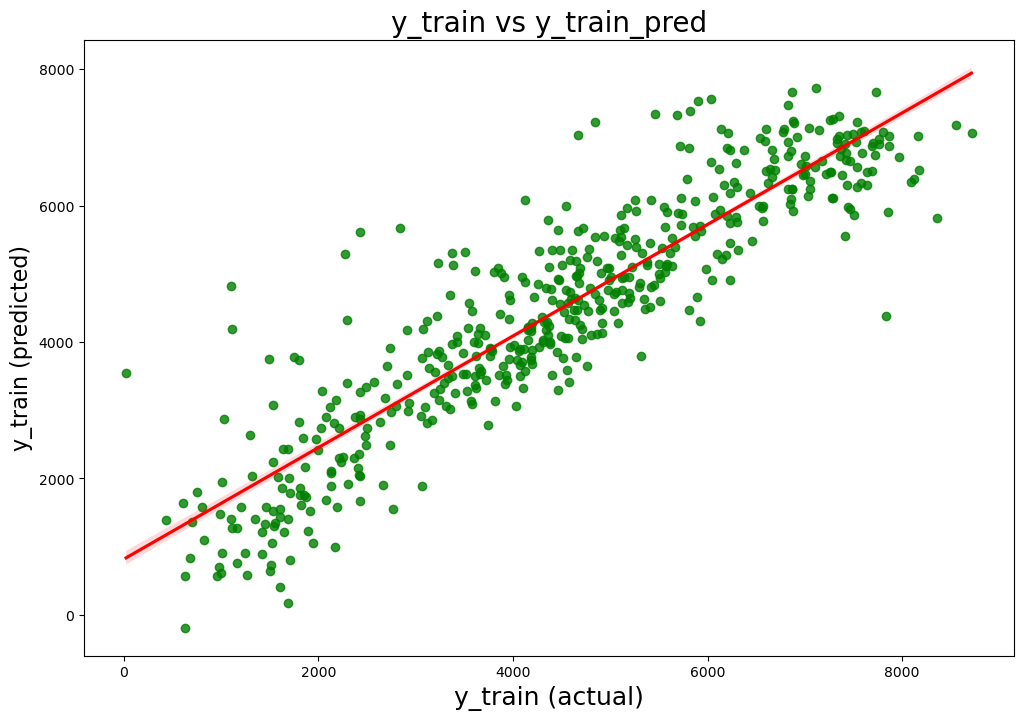

In [128]:
plt.figure(figsize=(12,8))
sns.regplot(x=y_train, y=y_train_pred, ci=68, fit_reg=True, scatter_kws={"color": "green"}, line_kws={"color": "red"})
plt.title('y_train vs y_train_pred', fontsize=20)
plt.xlabel('y_train (actual)', fontsize=18)
plt.ylabel('y_train (predicted)', fontsize=16)
plt.show()

`Findings/Observations:` Predicted values line up with actual trend for training dataset

### Independent error terms & homoscedasticity

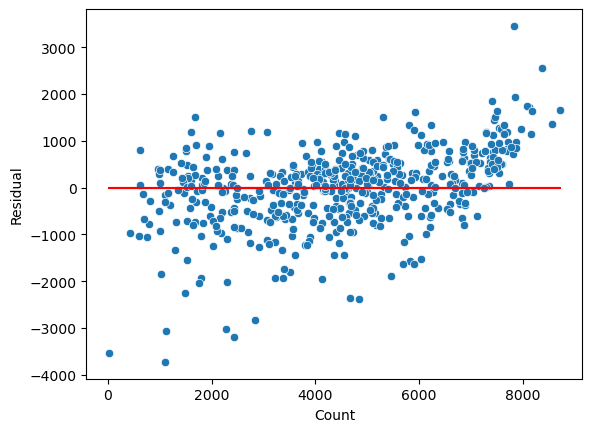

In [129]:
y_train_pred = bike_shr_lr.predict(X_train[feature_set])
residual = y_train - y_train_pred
sns.scatterplot(x = y_train, y= residual)
plt.plot(y_train, y_train - y_train, '-r')
plt.xlabel('Count')
plt.ylabel('Errors')
plt.show()

`Findings/Observations:` 
- No obvious pattern among errors. The error values are independent of each other. 
- Terms are not converging/diverging, they have constant variance based on the plots above. (Homoscedasticity)

## Making predictions using the final model

### Scaling the test dataset

In [130]:
# Get the dependent variable
y_test = bike_shr_test_df.pop('cnt')

# Scale the test dataset.
bike_shr_test_df[numerics] = scaler.transform(bike_shr_test_df[numerics])

# Pick the features which are part of our model.
X_test = bike_shr_test_df[feature_set]

# Add the constant
X_test_sm = sm.add_constant(X_test)

# Applying the model and generating y_test_pred
y_test_pred = bike_shr_lr.predict(X_test)


### Visualizing linearity in test data and predictions

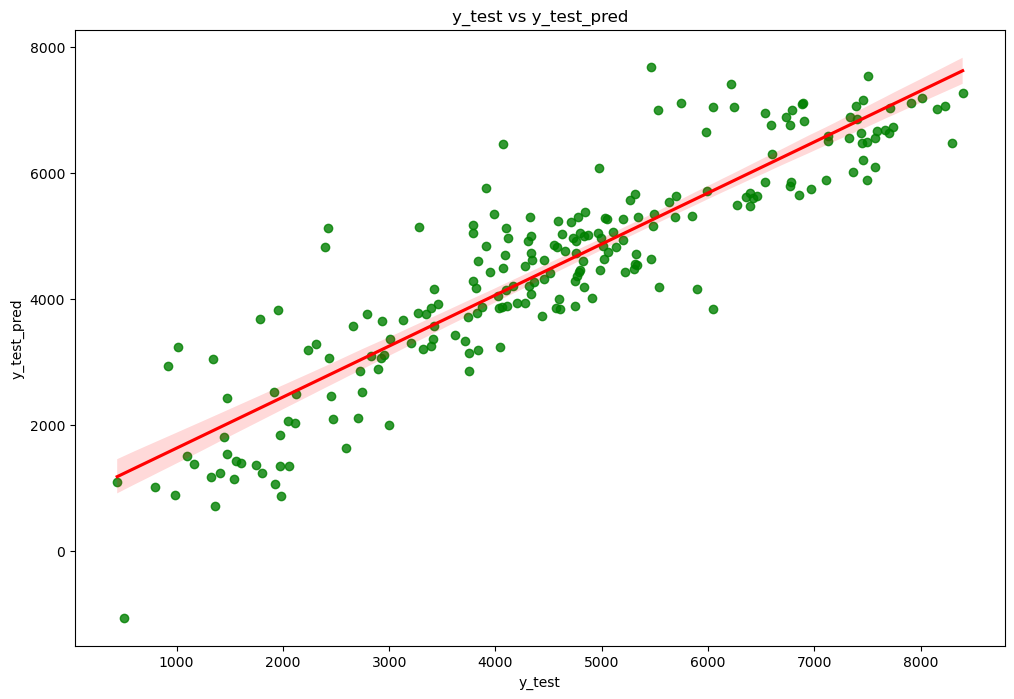

In [131]:
plt.figure(figsize=(12,8))
sns.regplot(x=y_test, y=y_test_pred, fit_reg=True, scatter_kws={"color":"green"}, line_kws={"color":"red"})
plt.ylabel('y_test_pred')
plt.xlabel('y_test')
plt.title('y_test vs y_test_pred')
plt.show()

### R-squared and Adjusted R-squared for test data

In [132]:
# Calculate R2 and adjusted scores for test data
r2 = r2_score(y_test, y_test_pred)
print("R squared (test): {0}".format(round(r2, 4)))

adjusted_r2 = (1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R-squared (test): {0}".format(round(adjusted_r2,4)))

R squared (test): 0.8091
Adjusted R-squared (test): 0.8018


### Equation:

**cnt** = `1010.0584` 
\+`2028.9952` X _yr_ + `4103.2348` X _temp_ - `589.1049` X _mnth_Jul_ + `539.6480` X _mnth_Sep_
\+ `676.2652` X _wthr_mostly_clear_ - `1897.6647` X _wthr_snowrain_light_ - `987.1736` X _season_Spring_
\+ `460.0991` X _season_Winter_

`Findings/Observations`: The test data `R-Squared` and `Adjusted R-Squared` are `0.8091` and `0.8018` respectively. This is pretty close to the training dataset's `R-squared` and `Adjusted R-squared`
\- `0.818` and `0.815`

# `-- END --`